In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(test_split=0.2, seed=42)

In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [4]:
boston_df = pd.DataFrame(np.concatenate((X_train, X_test)),
                         columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])
boston_df['MEDV'] = np.concatenate((y_train, y_test))
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04,23.6
1,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53,32.4
2,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6
3,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,22.8
4,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66,19.5
502,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00,21.1
503,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99,24.5
504,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27,13.4


In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
boston_df.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
boston_df[:404].shape

(404, 14)

In [8]:
X = boston_df.drop(columns='MEDV', axis=1)
y = boston_df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [9]:
y.mean(), y.median()

(22.53280632411067, 21.2)

In [10]:
ct = make_column_transformer((MinMaxScaler(), ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']),
                             remainder='passthrough')
ct.fit(X_train)

c:\Users\hanya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS',
                                  'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])])

In [11]:
X_train_norm = ct.transform(X_train)
X_test_norm = ct.transform(X_test)

In [12]:
X_train_norm.shape, X_test_norm.shape

((404, 13), (102, 13))

In [13]:
def mae(y_true, y_preds):
    return tf.keras.losses.mae(y_true, tf.squeeze(y_preds)).numpy()


def mse(y_true, y_preds):
    return tf.keras.losses.mse(y_true, tf.squeeze(y_preds)).numpy()

In [14]:
tf.random.set_seed(42)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

history_1 = model_1.fit(X_train_norm, y_train, epochs=1000, callbacks=[callback])

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.6269 - mae: 22.6269  
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 22.1205 - mae: 22.1205
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 21.6141 - mae: 21.6141
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 21.1077 - mae: 21.1077
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 20.6013 - mae: 20.6013
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 20.0949 - mae: 20.0949
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 19.5897 - mae: 19.5897
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - loss: 19.0899 - mae: 19.0899
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 18.5944 - mae: 18.5944
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 18.0994 - mae: 18.0994
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 17.6105 - mae: 17.6105
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 

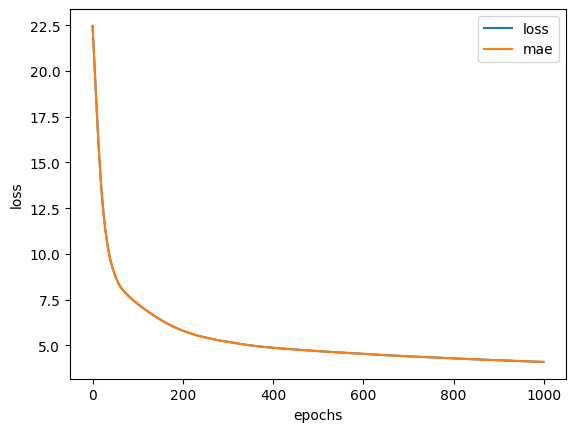

In [15]:
pd.DataFrame(history_1.history).plot(xlabel='epochs', ylabel='loss');

In [16]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16 (68.00 B)

 Trainable params: 14 (56.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [17]:
model_1.evaluate(X_test_norm, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.9524 - mae: 3.9524 


[3.9437832832336426, 3.9437832832336426]

In [18]:
preds_1 = model_1.predict(X_test_norm)
mae_1 = mae(y_test, preds_1)
mse_1 = mse(y_test, preds_1)
mae_1, mse_1

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


(3.9437833, 36.74902)

In [19]:
tf.random.set_seed(42)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
history_2 = model_2.fit(X_train_norm, y_train, epochs=1000, callbacks=[callback])

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 21.3478 - mae: 21.3478
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - loss: 19.1167 - mae: 19.1167
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 16.1236 - mae: 16.1236
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 12.5763 - mae: 12.5763
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 9.8460 - mae: 9.8460 
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 8.3277 - mae: 8.3277
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 7.6560 - mae: 7.6560
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 7.3620 - mae: 7.3620
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 7.1151 - mae: 7.1151
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 6.8848 - mae: 6.8848
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 6.6680 - mae: 6.6680
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 6.4609 - mae:

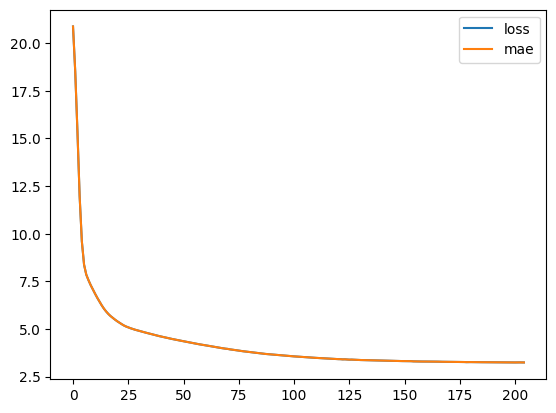

In [20]:
pd.DataFrame(history_2.history).plot();

In [21]:
model_2.evaluate(X_test_norm, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.0554 - mae: 3.0554 


[3.0210134983062744, 3.0210134983062744]

In [22]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 10)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153 (616.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [23]:
preds_2 = model_2.predict(X_test_norm)
mae_2 = mae(y_test, preds_2)
mse_2 = mse(y_test, preds_2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [24]:
tf.random.set_seed(42)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=5)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

history_3 = model_3.fit(X_train_norm, y_train, epochs=1000, callbacks=[callback])

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step - loss: 21.7925 - mae: 21.7925
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 21.5627 - mae: 21.5627
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 21.3318 - mae: 21.3318
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 21.1021 - mae: 21.1021
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 20.8631 - mae: 20.8631
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 20.6066 - mae: 20.6066
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 20.3147 - mae: 20.3147
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 19.9711 - mae: 19.9711
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 19.5856 - mae: 19.5856
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 19.1689 - mae: 19.1689
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 18.7256 - mae: 18.7256
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 

In [25]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 455 (1.78 KB)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 304 (1.19 KB)

In [26]:
model_3.evaluate(X_test_norm, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.6389 - mae: 2.6389 


[2.546752691268921, 2.546752691268921]

In [27]:
preds_3 = model_3.predict(X_test_norm)
mae_3 = mae(y_test, preds_3)
mse_3 = mse(y_test, preds_3)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001DFA75B3240> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [28]:
tf.random.set_seed(42)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['mae'])

history_4 = model_4.fit(X_train_norm, y_train, epochs=1000, callbacks=[callback])

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 19.8864 - mae: 19.8864   
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 8.8025 - mae: 8.8025 
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 5.4120 - mae: 5.4120
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 4.9891 - mae: 4.9891
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 4.4451 - mae: 4.4451
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.0272 - mae: 4.0272 
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 3.5151 - mae: 3.5151
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 3.2527 - mae: 3.2527
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 3.1181 - mae: 3.1181
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 2.9936 - mae: 2.9936
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 3.0498 - mae: 3.0498
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - loss: 2.9799 - mae: 2.979

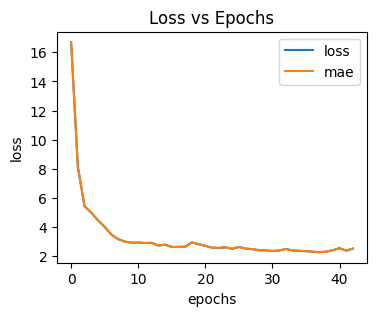

In [29]:
pd.DataFrame(history_4.history).plot(xlabel='epochs', ylabel='loss', figsize=(4, 3), title='Loss vs Epochs');

In [30]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 50)             │           700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,555 (68.58 KB)

 Trainable params: 5,851 (22.86 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,704 (45.72 KB)

In [31]:
model_4.evaluate(X_test_norm, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.6630 - mae: 2.6630 


[2.4252521991729736, 2.4252521991729736]

In [32]:
preds_4 = model_4.predict(X_test_norm)
mae_4 = mae(y_test, preds_4)
mse_4 = mse(y_test, preds_4)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [33]:
tf.random.set_seed(42)
tf.keras.callbacks.EarlyStopping(monitor='loss',
                                  patience=5)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                metrics=['mae'])

history_5 = model_5.fit(X_train_norm, y_train, epochs=1000, callbacks=[callback])

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.7194 - mae: 22.7194  
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.0072 - mae: 22.0072 
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 20.8148 - mae: 20.8148
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16.3852 - mae: 16.3852 
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 7.7159 - mae: 7.7159


In [34]:
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 100)            │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,703 (84.78 KB)

 Trainable params: 21,701 (84.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [35]:
model_5.evaluate(X_test_norm, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.4094 - mae: 6.4094 


[6.409393787384033, 6.409393787384033]

In [36]:
preds_5 = model_5.predict(X_test_norm)
mae_5 = mae(y_test, preds_5)
mse_5 = mse(y_test, preds_5)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [37]:
scores = pd.DataFrame([['model_1', mae_1, mse_1],
                       ['model_2', mae_2, mse_2],
                       ['model_3', mae_3, mse_3],
                       ['model_4', mae_4, mse_4],
                       ['model_5', mae_5, mse_5]], columns=['model', 'mae', 'mse'])
scores

,model,mae,mse
0,model_1,3.943783,36.749020
1,model_2,3.021013,20.434771
2,model_3,2.546753,13.850088
3,model_4,2.425252,14.932430
4,model_5,6.409393,84.183029


## Best Performer
* `model_3` emerged as the best performer